In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [208]:
df = pd.read_csv("insurance.csv")

In [209]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [210]:
df['children'] = df['children'].astype("object")

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [212]:
df.shape

(1338, 7)

In [213]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [214]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [215]:
categorical = [column for column in df.columns if df[column].dtype == "O"]
numeric = [column for column in df.columns if column not in categorical]

In [216]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


C:\Users\darks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


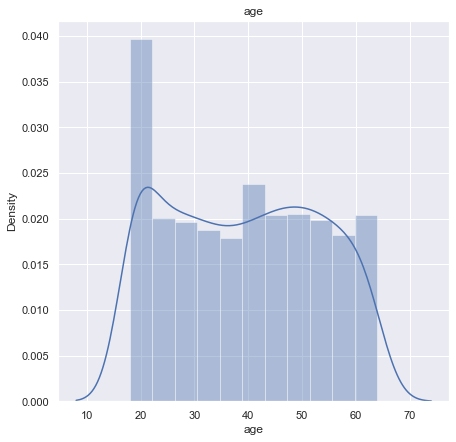

C:\Users\darks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


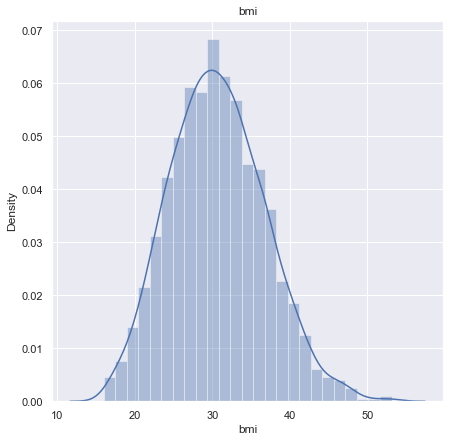

C:\Users\darks\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


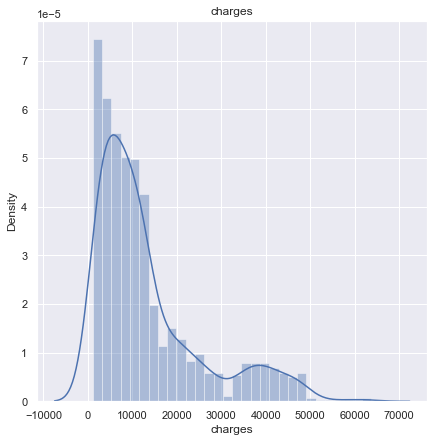

In [217]:
sns.set()

for column in numeric:
    plt.figure(figsize=(7,7))
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

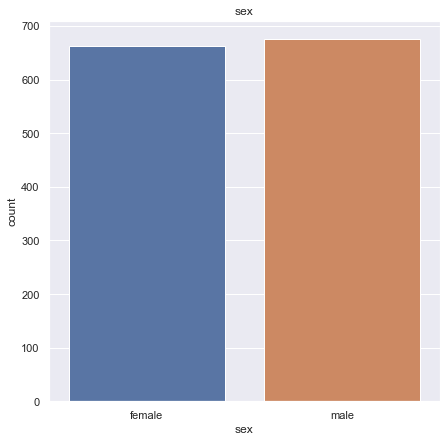

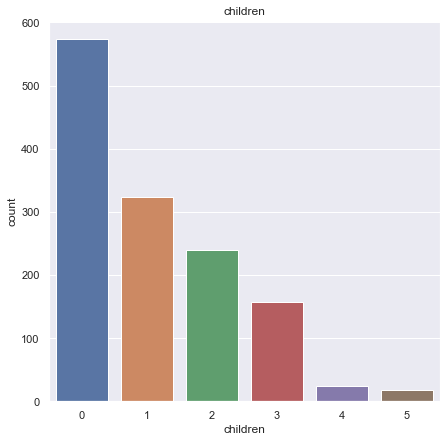

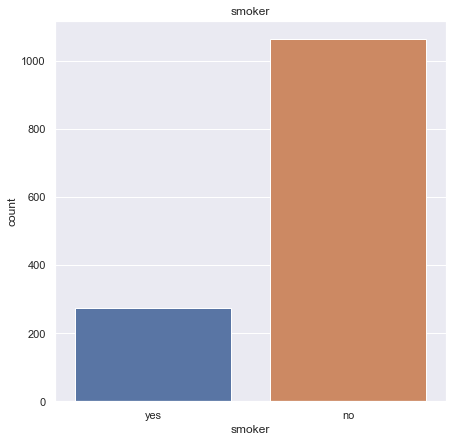

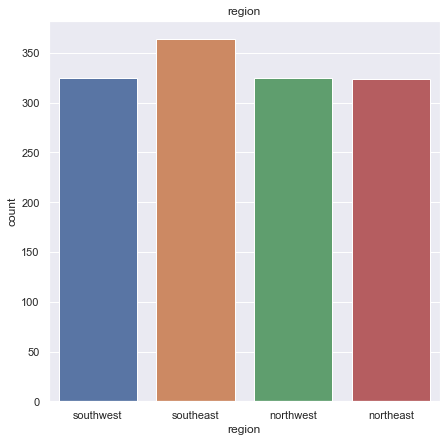

In [218]:
for column in categorical:
    plt.figure(figsize=(7,7))
    sns.countplot(x=column, data=df)
    plt.title(column)
    plt.show()

In [220]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

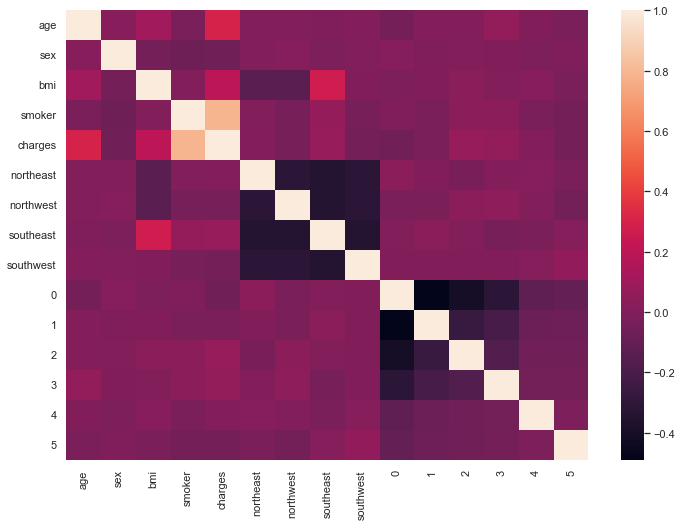

In [238]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='sex', ylabel='charges'>

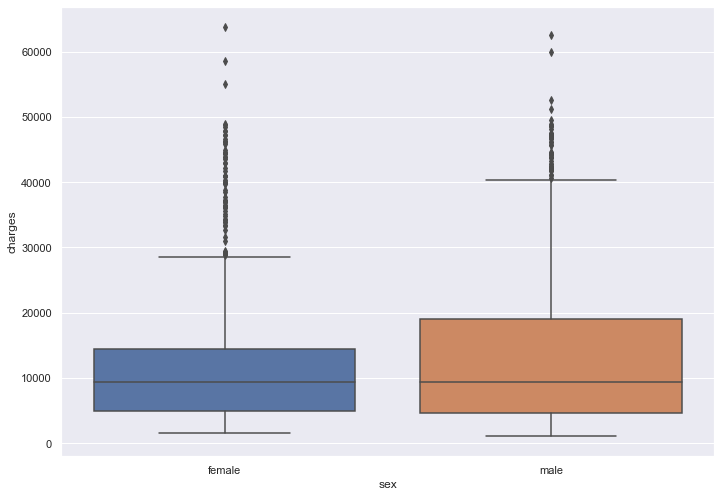

In [222]:
sns.boxplot(x='sex', y='charges', data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

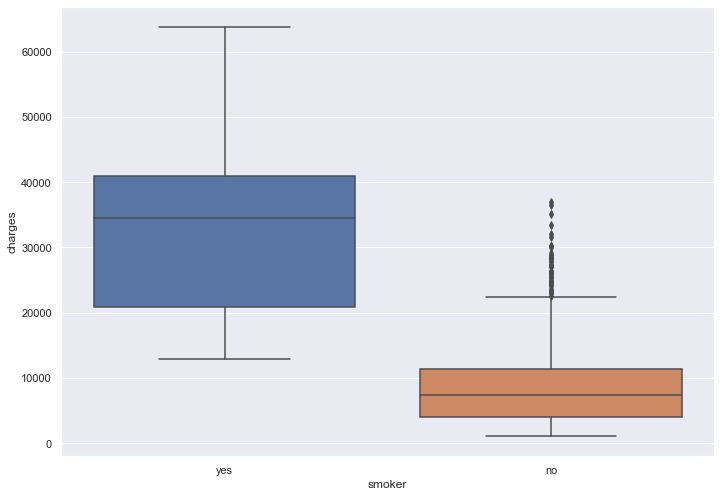

In [223]:
sns.boxplot(x='smoker', y='charges', data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

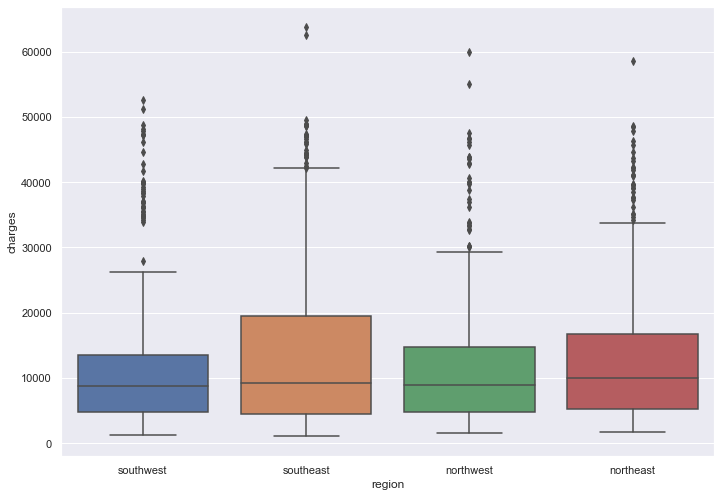

In [224]:
sns.boxplot(x='region', y='charges', data=df)

Text(0.5, 1.0, 'Charge Vs BMI')

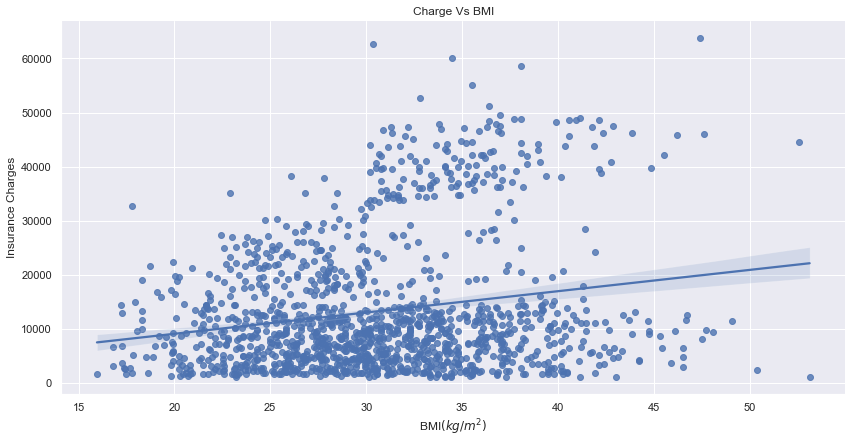

In [225]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('BMI$(kg/m^2)$')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI')

In [226]:
chargesMoreThan40000 = df[df['charges'] > 40000]

<AxesSubplot:xlabel='sex', ylabel='charges'>

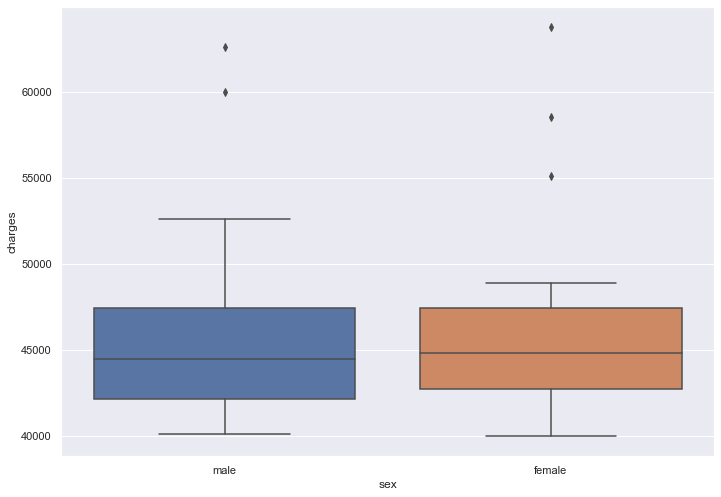

In [241]:
sns.boxplot(x='sex', y='charges', data=chargesMoreThan40000)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

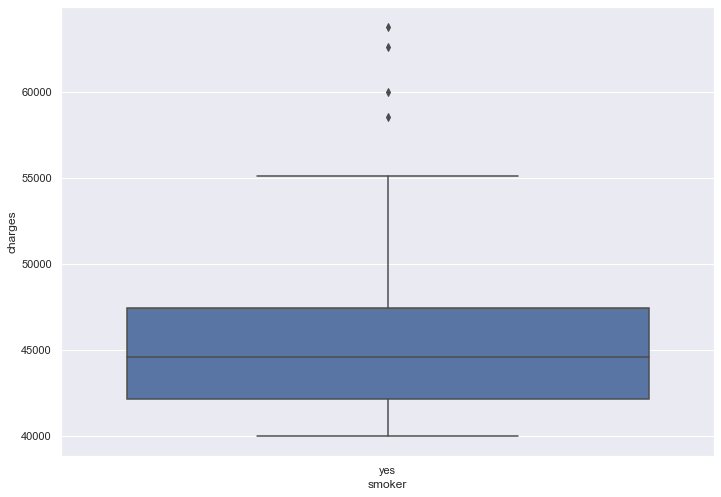

In [228]:
sns.boxplot(x='smoker', y='charges', data=chargesMoreThan40000)

<AxesSubplot:xlabel='sex', ylabel='charges'>

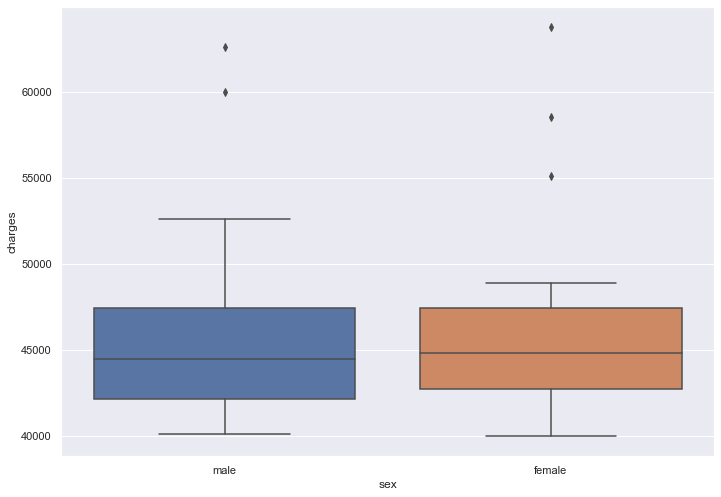

In [229]:
sns.boxplot(x='sex', y='charges', data=chargesMoreThan40000)

In [230]:
df.replace({"sex":{"male":1,"female":2}, "smoker":{"yes":1,"no":0}},inplace=True)

In [231]:
df = pd.concat([df, pd.get_dummies(df['region'])], axis=1).drop(['region'],axis=1)
df = pd.concat([df, pd.get_dummies(df['children'])], axis=1).drop(['children'],axis=1)

In [232]:
df.head()

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5
0,19,2,27.900,1,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,1,33.770,0,1725.55230,0,0,1,0,0,1,0,0,0,0
2,28,1,33.000,0,4449.46200,0,0,1,0,0,0,0,1,0,0
3,33,1,22.705,0,21984.47061,0,1,0,0,1,0,0,0,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0,1,0,0,0,0,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   smoker     1338 non-null   int64  
 4   charges    1338 non-null   float64
 5   northeast  1338 non-null   uint8  
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
 9   0          1338 non-null   uint8  
 10  1          1338 non-null   uint8  
 11  2          1338 non-null   uint8  
 12  3          1338 non-null   uint8  
 13  4          1338 non-null   uint8  
 14  5          1338 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 65.5 KB


In [234]:
#implement Standard scaler

In [235]:
s = StandardScaler()

In [236]:
s_df = s.fit_transform(df[['bmi','age']])

In [237]:
s_df

array([[-0.45332   , -1.43876426],
       [ 0.5096211 , -1.50996545],
       [ 0.38330685, -0.79795355],
       ...,
       [ 1.0148781 , -1.50996545],
       [-0.79781341, -1.29636188],
       [-0.26138796,  1.55168573]])

In [151]:
s_df = pd.DataFrame(s_df, columns=df[['bmi','age']].columns.values)

In [153]:
df1 = df.drop(columns=['age','bmi'],axis=1)

In [154]:
df1 = pd.concat([df1, s_df], axis=1)

In [155]:
df1.head()

,sex,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5,bmi,age
0,2,1,16884.92400,0,0,0,1,1,0,0,0,0,0,-0.453320,-1.438764
1,1,0,1725.55230,0,0,1,0,0,1,0,0,0,0,0.509621,-1.509965
2,1,0,4449.46200,0,0,1,0,0,0,0,1,0,0,0.383307,-0.797954
3,1,0,21984.47061,0,1,0,0,1,0,0,0,0,0,-1.305531,-0.441948
4,1,0,3866.85520,0,1,0,0,1,0,0,0,0,0,-0.292556,-0.513149


In [156]:
X = df1.drop(['charges'],axis=1)
y = df1['charges']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [159]:
lg = LinearRegression()

In [160]:
ml1 = lg.fit(X_train, y_train)

In [161]:
ml1.score(X_test,y_test)

0.7843246077701619

In [162]:
y_predlr1 = ml1.predict(X_test)

In [163]:
msereg1 = mean_squared_error(y_predlr1, y_test)
r2reg1 = r2_score(y_predlr1, y_test)

In [164]:
r2_score(y_predlr1, y_test)

0.7091251387279432

In [165]:
# implement min_max_scaler

In [166]:
mm = MinMaxScaler()

In [167]:
mm_df = mm.fit_transform(df[['bmi','age']])

In [168]:
mm_df = pd.DataFrame(mm_df, columns=df[['bmi','age']].columns.values)

In [169]:
df2 = df.drop(columns=['age','bmi'],axis=1)

In [170]:
df2 = pd.concat([df2, mm_df], axis=1)

In [171]:
df2.head()

,sex,smoker,charges,northeast,northwest,southeast,southwest,0,1,2,3,4,5,bmi,age
0,2,1,16884.92400,0,0,0,1,1,0,0,0,0,0,0.321227,0.021739
1,1,0,1725.55230,0,0,1,0,0,1,0,0,0,0,0.479150,0.000000
2,1,0,4449.46200,0,0,1,0,0,0,0,1,0,0,0.458434,0.217391
3,1,0,21984.47061,0,1,0,0,1,0,0,0,0,0,0.181464,0.326087
4,1,0,3866.85520,0,1,0,0,1,0,0,0,0,0,0.347592,0.304348


In [172]:
X = df2.drop(['charges'],axis=1)
y = df2['charges']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2,random_state=42) 

In [173]:
ml2 = lg.fit(X_train2,y_train2)

In [174]:
ml2.score(X_test2,y_test2)

0.7832007001631353

In [175]:
y_predlr2 = ml2.predict(X_test2)

In [176]:
msereg2 = mean_squared_error(y_predlr2, y_test2)
r2reg2 = r2_score(y_predlr2, y_test2)

In [177]:
#implement SVM
from sklearn.tree import DecisionTreeRegressor

In [178]:
tr = DecisionTreeRegressor()

In [179]:
tr.fit(X_train, y_train)

DecisionTreeRegressor()

In [180]:
y_preddt1 = tr.predict(X_test)

In [181]:
msedt1 = mean_squared_error(y_preddt1, y_test)
r2dt1 = r2_score(y_preddt1, y_test)

In [182]:
tr.fit(X_train2, y_train2)

DecisionTreeRegressor()

In [183]:
y_preddt2 = tr.predict(X_test2)

In [184]:
msedt2 = mean_squared_error(y_preddt2, y_test2)
r2dt2 = r2_score(y_preddt2, y_test2)

In [185]:
from sklearn.linear_model import SGDRegressor

In [186]:
sgdr = SGDRegressor() 

In [187]:
sgdr.fit(X_train, y_train)

SGDRegressor()

In [188]:
y_predsgd1 = sgdr.predict(X_test)

In [189]:
msesgd1 = mean_squared_error(y_predsgd1, y_test)
r2sgd1 = r2_score(y_predsgd1, y_test)

In [190]:
sgdr.fit(X_train2, y_train2)

SGDRegressor()

In [191]:
y_predsgd2 = sgdr.predict(X_test2)
msesgd2 = mean_squared_error(y_predsgd2, y_test2)
r2sgd2 = r2_score(y_predsgd2, y_test2)

In [192]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [193]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

In [194]:
y_predereg1 = ereg.predict(X_test)
mseereg1 = mean_squared_error(y_predereg1, y_test)
r2ereg1 = r2_score(y_predereg1, y_test)

In [195]:
ereg = ereg.fit(X_train2, y_train2)

In [196]:
y_predereg2 = ereg.predict(X_test)
mseereg2 = mean_squared_error(y_predereg2, y_test2)
r2ereg2 = r2_score(y_predereg2, y_test2)

In [197]:
results = pd.DataFrame({"MSE_standardScaled": [msereg1,msesgd1,msedt1,mseereg1], "R2_standardScaled":[r2reg1,r2sgd1,r2dt1,r2ereg1], 
                         "MSE_MinMaxScaled":[msereg2,msesgd2,msedt2,mseereg2],"R2_MinMaxScaled":[r2reg2,r2sgd2,r2dt2,r2ereg2] }
                     ,index = ['LinearRegression','SGDRegressor','DecisionTreeRegressor','VotingRegressor'])    

In [203]:
results = results.T

In [204]:
results

,MSE_standardScaled,R2_standardScaled,MSE_MinMaxScaled,R2_MinMaxScaled
LinearRegression,3.348333e+07,0.709125,3.365782e+07,0.708086
SGDRegressor,3.364203e+07,0.708795,3.410265e+07,0.696612
DecisionTreeRegressor,4.576678e+07,0.723895,4.656561e+07,0.731254
VotingRegressor,1.991070e+07,0.844361,6.806831e+07,0.625776


Text(0, 0.5, 'MSE')

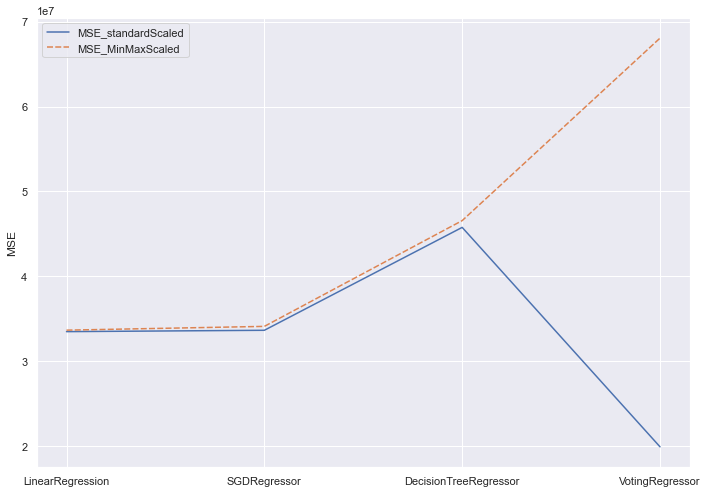

In [246]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=results[['MSE_standardScaled','MSE_MinMaxScaled']])
plt.ylabel('MSE')

Text(0, 0.5, 'R2 Score')

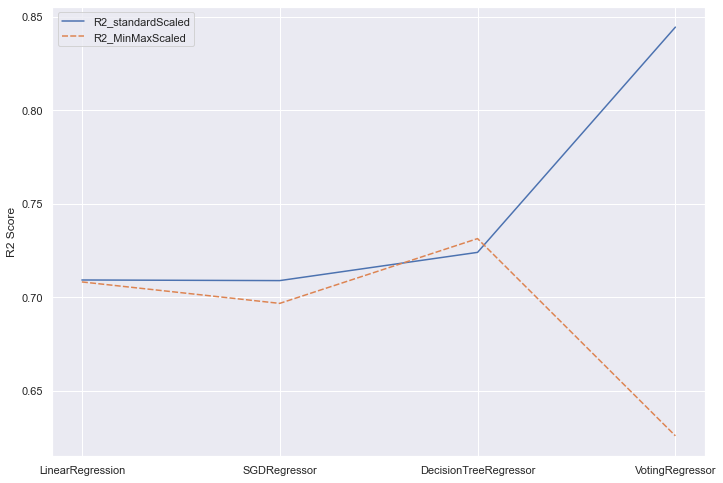

In [247]:
sns.lineplot(data=results[['R2_standardScaled','R2_MinMaxScaled']])
plt.ylabel('R2 Score')

In [253]:
dict_models ={"DecissionTreeRegressor - Standard Scaled":y_preddt1,
              "DecissionTreeRegressor - MinMax Scaled":y_preddt2,
              "VotingRegressor - Standard Scaled":y_predereg1,
              "VotingRegressor - MinMax Scaled":y_preddt2,
              "LinearRegression - Standard Scaled":y_predlr1,
              "Linearregression - MinMax Scaled":y_predlr2,
              "SGDregression - Standard Scaled":y_predsgd1,
              "SGD regression MinMax Scaled":y_predsgd2}

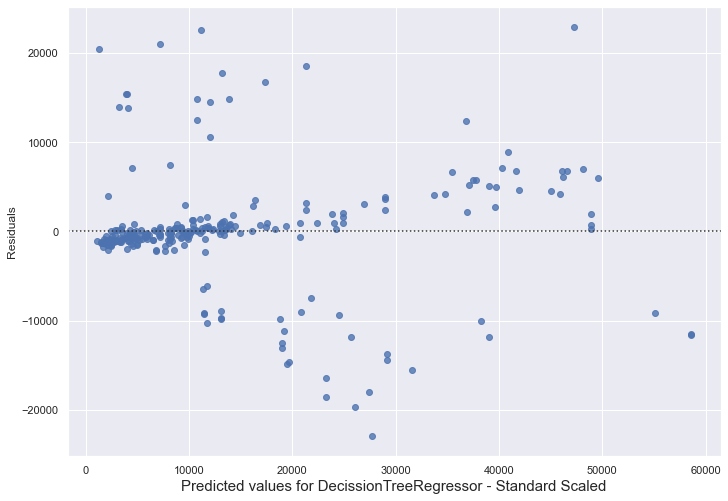

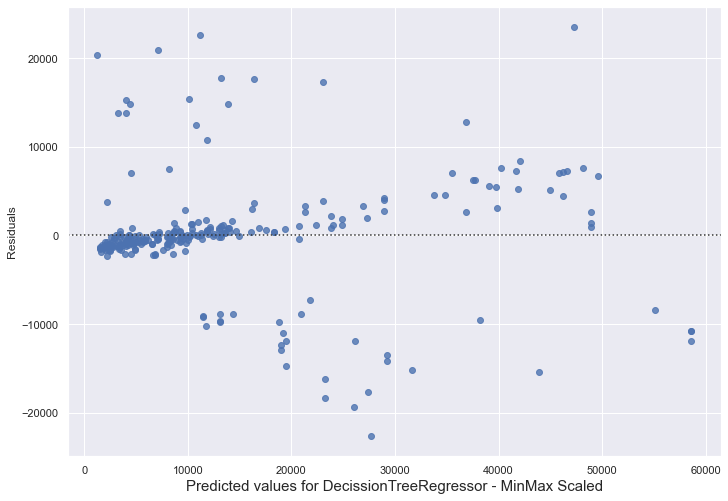

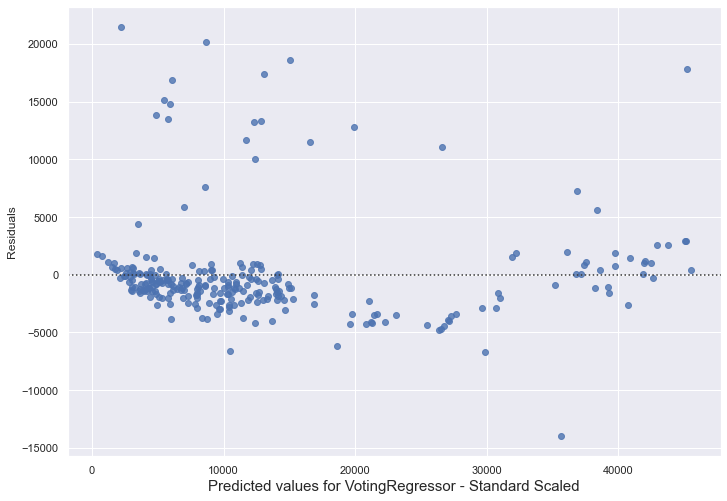

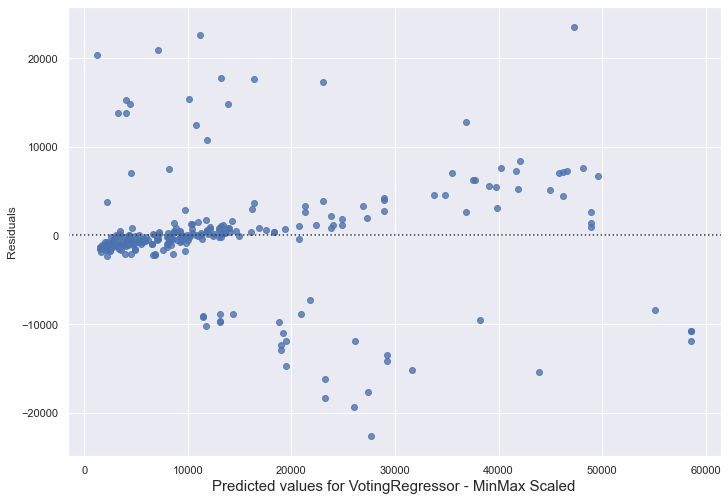

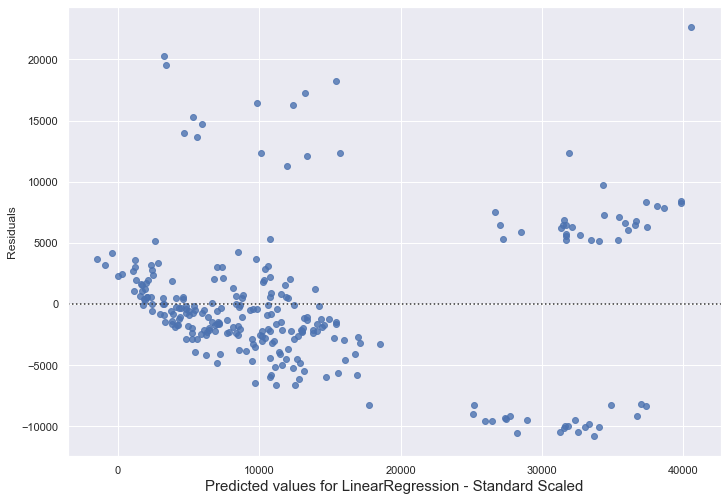

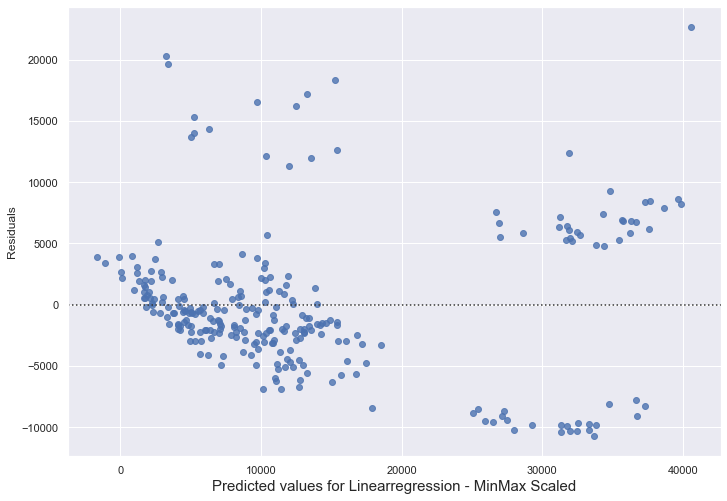

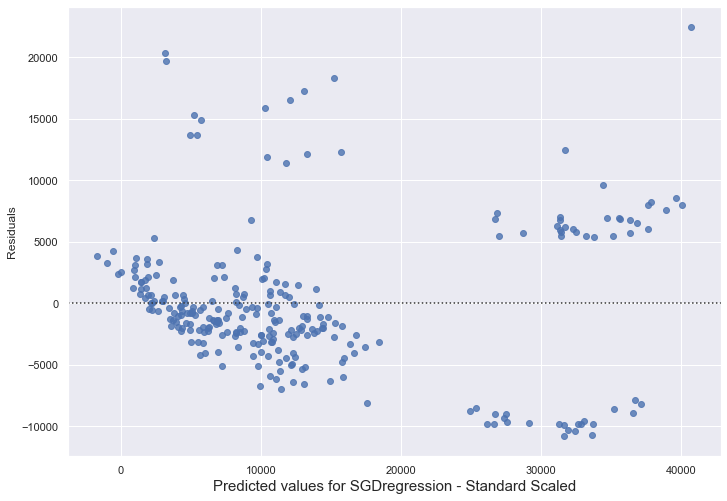

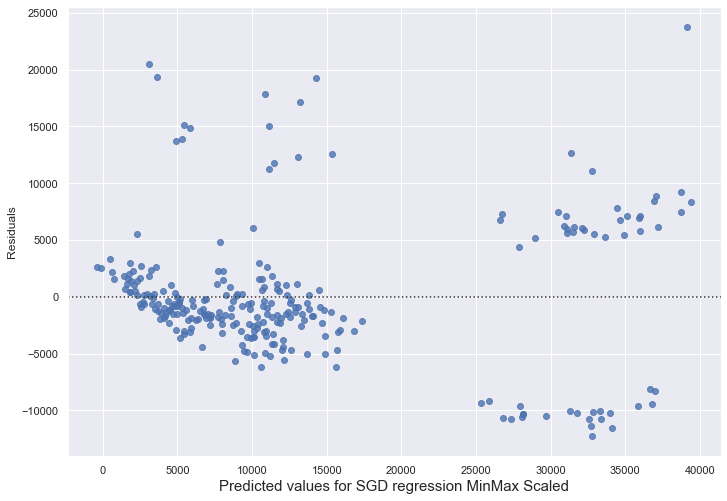

In [258]:
for pred in ["DecissionTreeRegressor - Standard Scaled"
             ,"DecissionTreeRegressor - MinMax Scaled",
             "VotingRegressor - Standard Scaled",
             "VotingRegressor - MinMax Scaled",
             "LinearRegression - Standard Scaled",
             "Linearregression - MinMax Scaled",
             "SGDregression - Standard Scaled",
             "SGD regression MinMax Scaled"]:
    sns.residplot(dict_models[pred], y_test2)
    plt.xlabel('Predicted values for {}'.format(pred), fontsize=15)
    plt.ylabel('Residuals')
    plt.show()

